### Explicação graficos

No nosso estudo, utilizamos o Quality Score para representar a qualidade interna do código nos repositórios Java analisados. No entanto, ao interpretar os dados, percebemos que quanto maior o Quality Score, pior a qualidade do código. Isso acontece porque a métrica é influenciada diretamente por características negativas, como alto acoplamento (CBO), baixa coesão (LCOM) e hierarquia de herança profunda (DIT).

- CBO (Coupling Between Objects) → Mede o grau de dependência entre classes.

Quanto maior o CBO, mais difícil é modificar e manter o código, pois ele depende de muitos outros componentes.

Alto CBO indica baixa modularidade e reutilização difícil.

- DIT (Depth of Inheritance Tree) → Mede a profundidade da herança.

DIT muito alto pode indicar código complexo e difícil de entender, pois classes profundas herdam muitas responsabilidades.

Por outro lado, DIT muito baixo pode significar pouca reutilização.

- LCOM (Lack of Cohesion of Methods) → Mede a coesão entre os métodos de uma classe.

Alto LCOM significa que os métodos da classe não compartilham muitos atributos em comum, indicando baixa coesão.

Código com baixa coesão é mais difícil de manter e reutilizar.

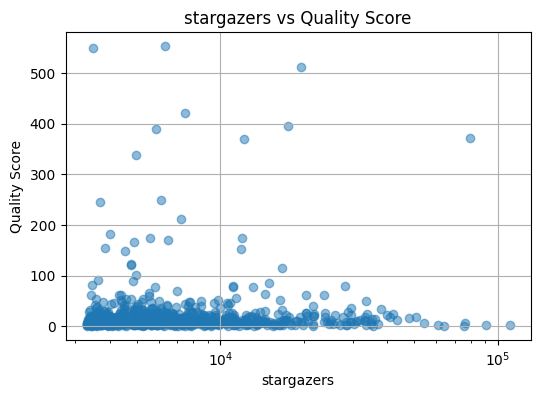

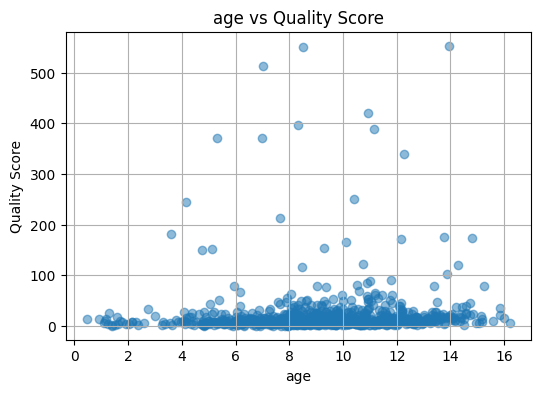

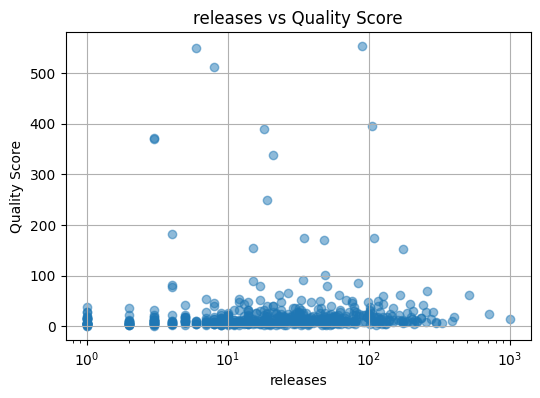

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("summarized_results.csv")

df.dropna(subset=['cbo_mean', 'dit_mean', 'lcom_mean'], inplace=True)

df['createdAt'] = pd.to_datetime(df['createdAt']).dt.tz_localize(None)
df['age'] = (pd.Timestamp.now().tz_localize(None) - df['createdAt']).dt.days / 365

quality_metrics = ['cbo_mean', 'dit_mean', 'lcom_mean']
process_metrics = ['stargazers', 'age', 'releases']

# Medias das métricas de qualidade
df['quality_score'] = df[quality_metrics].mean(axis=1)

correlation_matrix = df[['quality_score'] + process_metrics].corr()

for p_metric in process_metrics:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[p_metric], df['quality_score'], alpha=0.5)
    plt.xscale('log') if p_metric in ['stargazers', 'releases'] else None  # Log scale for large numbers
    plt.xlabel(p_metric)
    plt.ylabel("Quality Score")
    plt.title(f"{p_metric} vs Quality Score")
    plt.grid(True)
    plt.show()



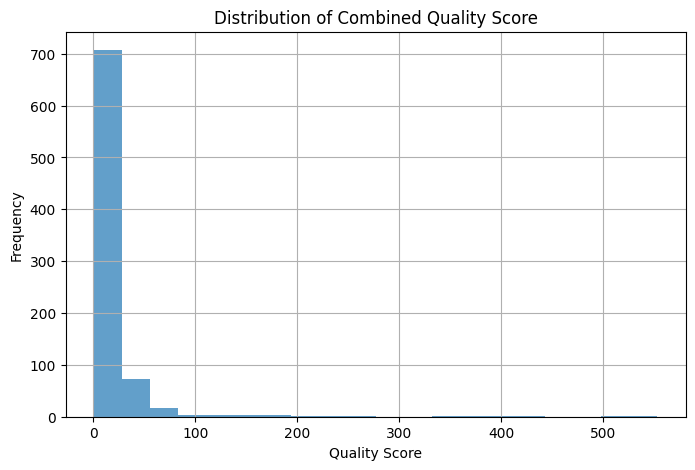

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df['quality_score'], bins=20, alpha=0.7)
plt.title("Distribution of Combined Quality Score")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

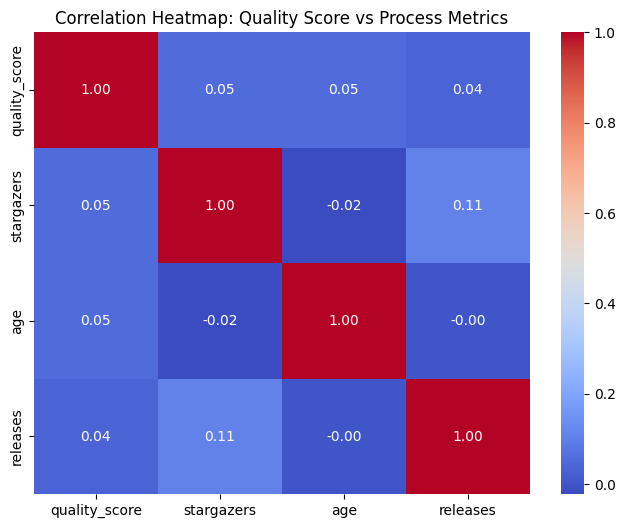

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Quality Score vs Process Metrics")
plt.show()